Extreme Learning Machine Applied to the Prediction and modelling of Steels using Big Data

In [ ]:
from google.colab import files
# To allow access to read google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy.io
input_data = scipy.io.loadmat('/content/drive/MyDrive/Final_Project/Big_Data_Steels/processed_data.mat')

In [ ]:
import numpy as np
import sys
# How tp print the size and shape of the mat file
# print(sys.getsizeof(input_data['X']))
# np.shape(input_data['X'])
# np.shape(input_data['Y'])
# input_data['X']
#  Show headers and values from the dictionary
# list(input_data. items())

raw_data =  input_data['X']
target_data =  input_data['Y']
X = raw_data
Y = target_data
print(X.shape,np.shape(Y), X.dtype,Y.dtype)

In [ ]:
# Convert list to a NUMPY array
X = np.array(X, dtype=np.float64)
Y = np.array(Y, dtype=np.float64)
print(X.shape,np.shape(Y), X.dtype,Y.dtype)
T = Y[:,0]
T.shape
# print(sys.getsizeof(T))

(63162, 27) (63162, 3) float64 float64


(63162,)

<function matplotlib.pyplot.show>

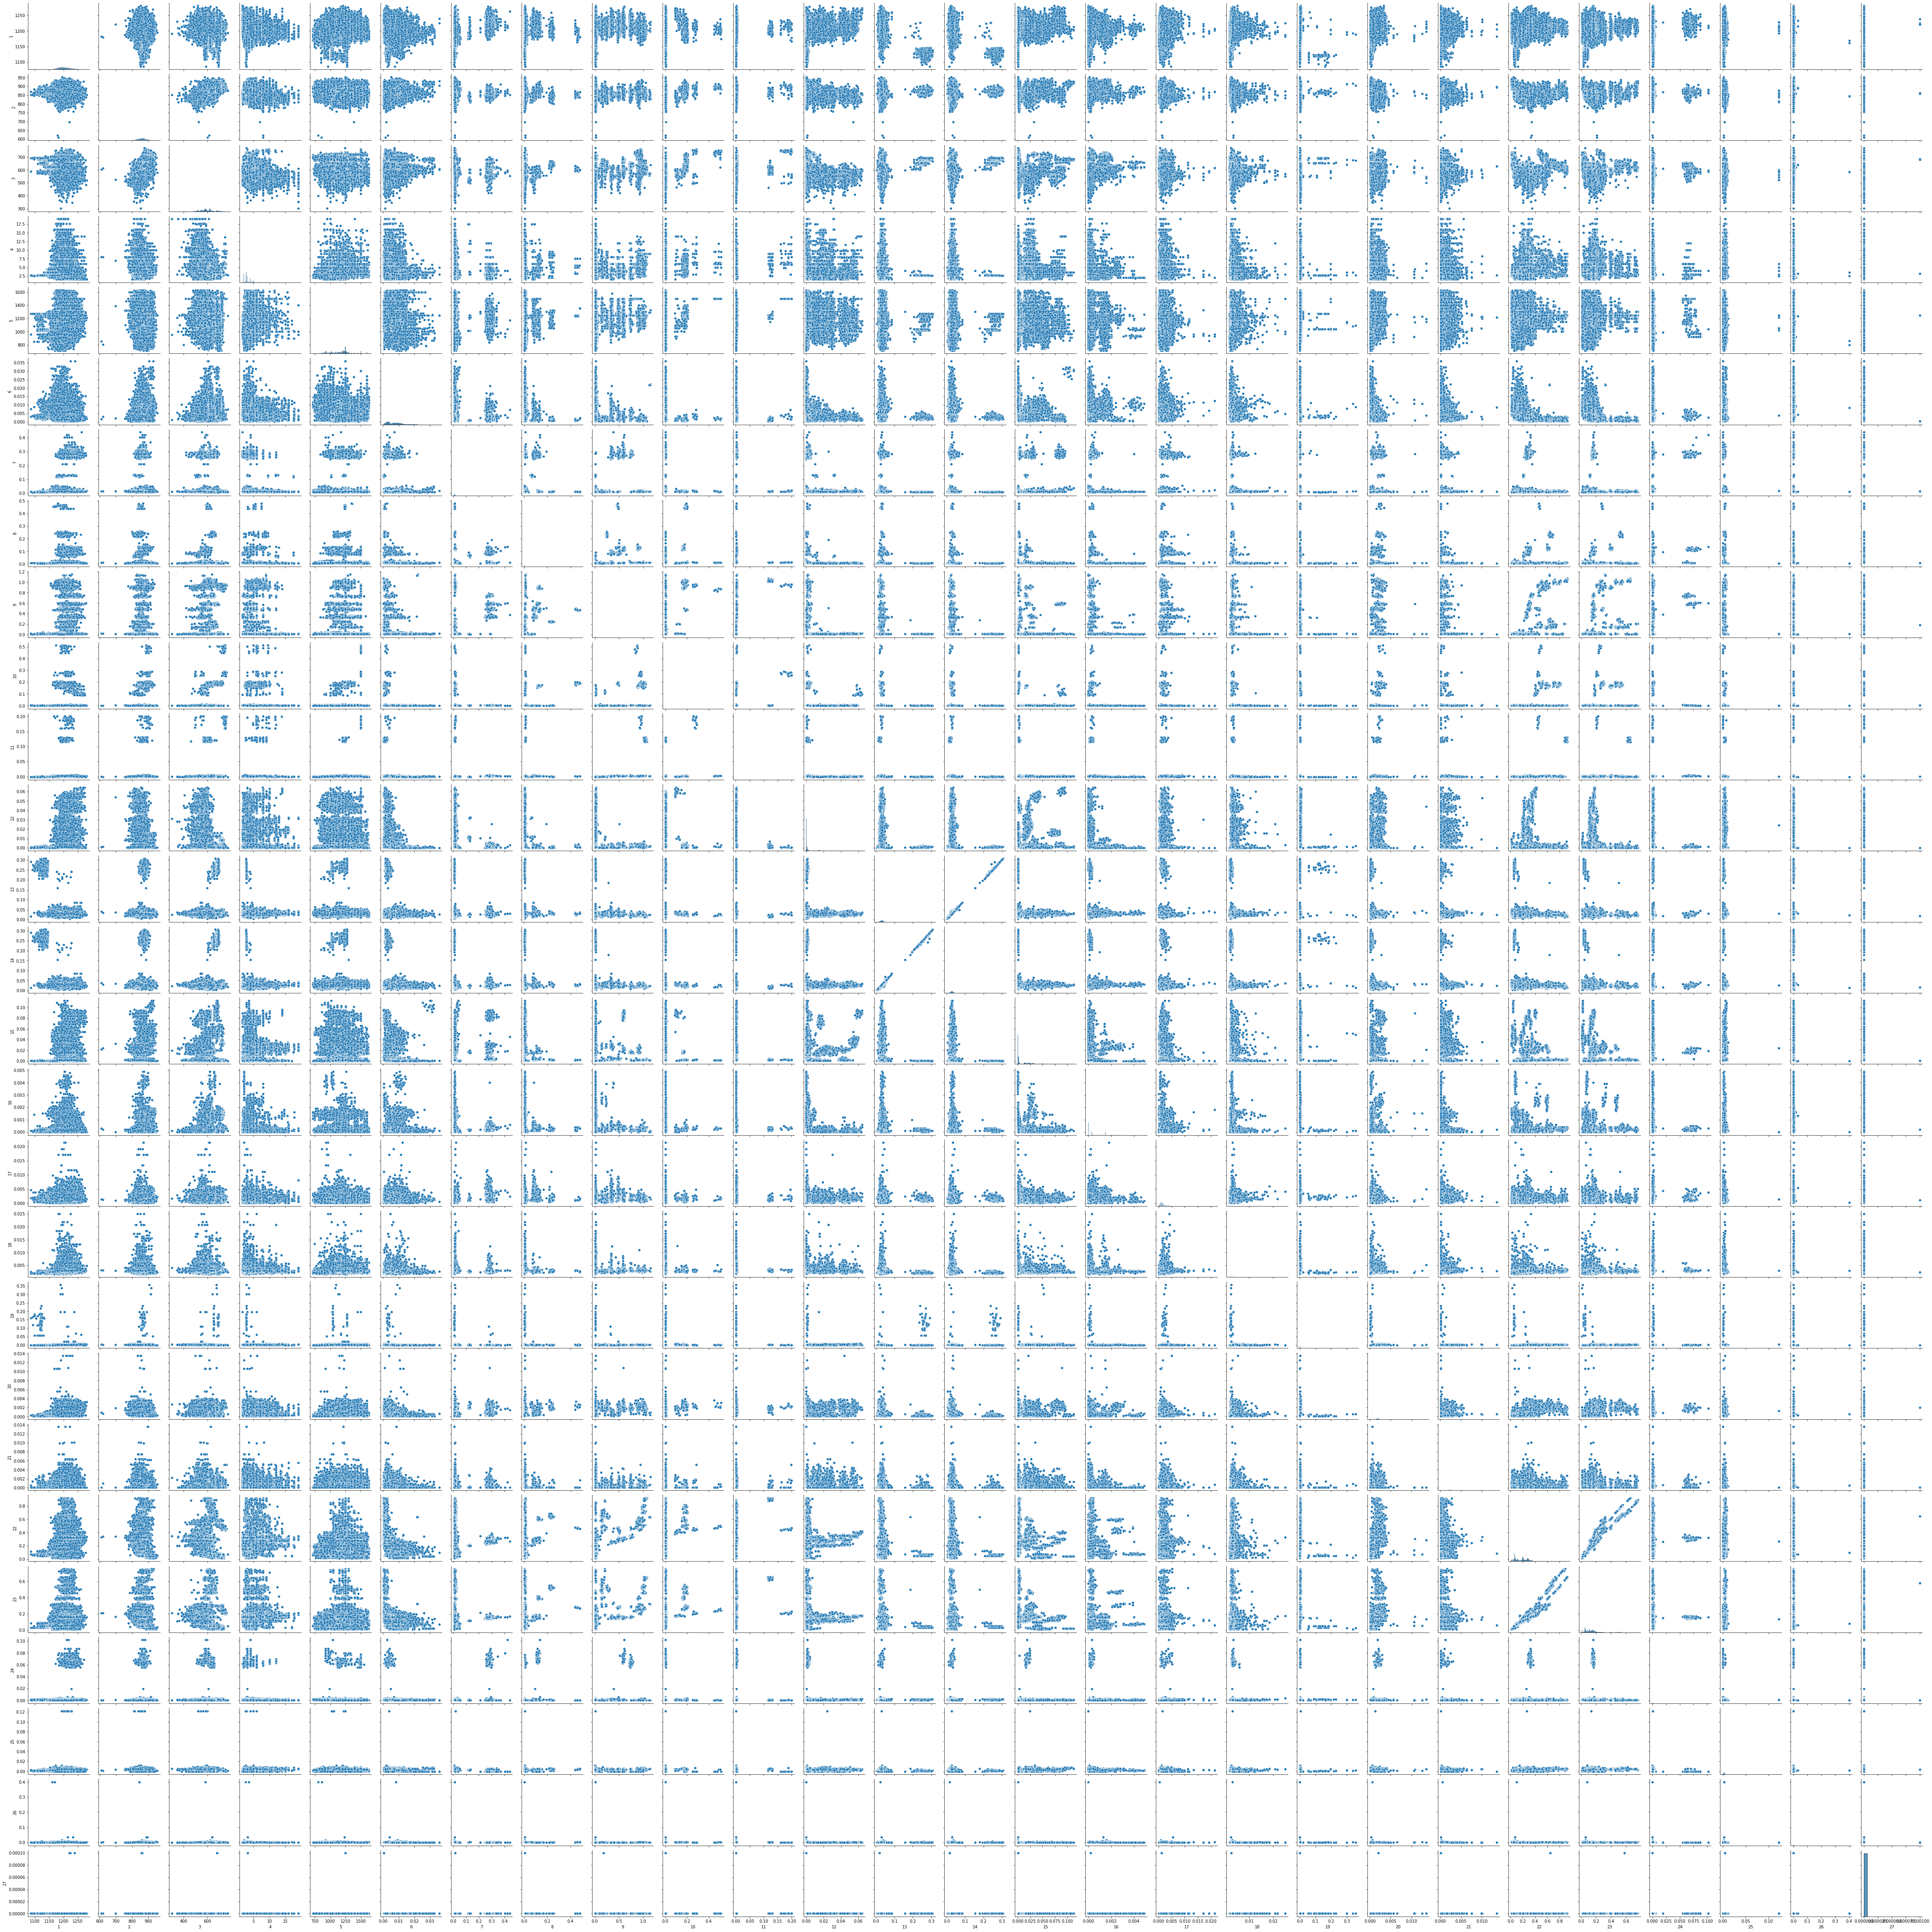

In [ ]:
import seaborn as sns
import pandas as pd
# Basic correlogram
# sns.pairplot(X)
# plt.show()
numpy_data = np.array([[1, 2], [3, 4]])
df = pd.DataFrame(data=X, columns=["1", "2","3", "4","5", "6","7", "8","9", "10","11", "12","13", "14","15", "16","17", "18","19", "20","21", "22","23", "24","25", "26","27"])
sns.pairplot(df)
plt.show

In [ ]:
#  Include this to copy elm into your workspace
!cp /content/drive/MyDrive/Lectures_ML/Week_7/Session_1/elm.py /content

In [ ]:
import elm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_digits, load_diabetes, make_regression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

#  ---------     Using Normal distribution
# stdsc = StandardScaler()
# xtoy = stdsc.fit_transform(X)

#  ---------     Normalise between [0-1]
scaler = MinMaxScaler()
scaler.fit(X)
xtoy= scaler.transform(X)
# irx
# np.amin(irx)
# np.amax(irx)
# print(T.shape)
x_train, x_test, y_train, y_test = train_test_split(xtoy, T, test_size=0.4)
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape)

(37897, 27) (37897,) (25265, 27) (25265,)


In [ ]:
# build model and train
model = elm.elm(hidden_units=20, activation_function='sigmoid', random_type='normal', x=x_train, y=y_train, C=5.23, elm_type='reg') 
beta, train_score, running_time = model.fit('solution2')
print("regression beta:\n", beta)
print("regression train score:", train_score)
print("regression running time:", running_time)

regression beta:
 [-1.68263123e+02 -1.20758404e+00  4.98880183e+02  2.01618130e+02
 -3.52871372e+02  9.48939757e+01  3.04037622e+02 -2.99121369e+02
 -4.77907785e+02  7.04297411e+02 -1.81014663e-01  5.46607263e+02
 -6.91200983e+02 -2.81684196e+02  9.04982970e+02 -8.43305785e+01
  3.01518729e+02  6.88390322e+02 -3.70985581e+02 -1.11587646e+03]
regression train score: 42.87191333665048
regression running time: 0.09924699999999831


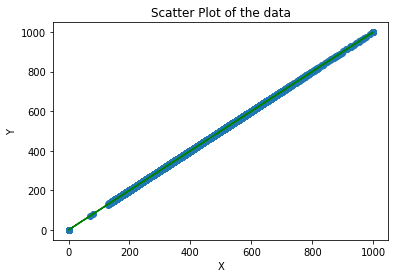

In [ ]:
plt.scatter(model.y, y_train)
plt.plot(model.y, model.y,'g-')
plt.title("Scatter Plot of the data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

regression result: [419.29371828 222.04200201 229.06846549 ... 536.7776116  281.49228681
 219.75438742]
regression score: 42.87191333665048
(37897,) (25265,)


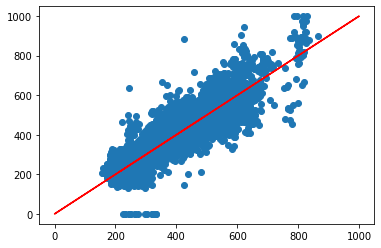

In [ ]:
prediction = model.predict(x_test)
print("regression result:", prediction.reshape(-1, ))
print("regression score:", model.score(x_test, y_test))
model.y

plt.scatter(prediction, y_test)
plt.plot(y_test, y_test,'r-')
print(model.y.shape, y_test.shape)